<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/peak2peak_aug_2022_oneBeat_softDTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
ppg_one_beat = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                           names = np.arange(120))
ppg_one_beat.shape
ppg_one_beat.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.00000,0.99971,0.99898,0.99602,0.99104,0.98427,0.97570,0.96534,0.95313,0.93891,...,0.86711,0.89480,0.91637,0.93424,0.95006,0.96290,0.97265,0.97946,0.98329,0.98515
1,1.00000,0.99986,0.99938,0.99671,0.99211,0.98582,0.97781,0.96817,0.95657,0.94259,...,0.87321,0.89588,0.91331,0.92665,0.93742,0.94541,0.95071,0.95352,0.95363,0.95355
2,1.00000,0.99805,0.99416,0.98829,0.98048,0.97107,0.96004,0.94735,0.93303,0.91708,...,0.83197,0.86486,0.89022,0.91013,0.92479,0.93626,0.94502,0.95083,0.95364,0.95499
3,0.91394,0.91331,0.91198,0.90826,0.90231,0.89456,0.88500,0.87378,0.86088,0.84626,...,0.86086,0.89582,0.92488,0.94820,0.96554,0.97851,0.98723,0.99360,0.99787,1.00000
4,0.91259,0.91280,0.91298,0.91087,0.90681,0.90120,0.89398,0.88514,0.87469,0.86219,...,0.91012,0.93643,0.95764,0.97392,0.98525,0.99285,0.99716,0.99942,0.99987,1.00000


In [5]:
ppg_10_beats = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv",
                           names = np.arange(1024))
ppg_10_beats.shape
ppg_10_beats.head()



,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.93827,0.93797,0.93668,0.93271,0.92657,0.91835,0.90804,0.89557,0.88077,0.86366,...,0.83921,0.87134,0.89890,0.92160,0.93962,0.95299,0.96284,0.96939,0.97306,0.97468
1,0.97918,0.97711,0.97282,0.96595,0.95673,0.94525,0.93125,0.91482,0.89634,0.87574,...,0.81925,0.85823,0.89068,0.91687,0.93754,0.95296,0.96399,0.97080,0.97323,0.97392
2,0.91117,0.91058,0.90876,0.90415,0.89734,0.88842,0.87828,0.86690,0.85514,0.83849,...,0.77387,0.81272,0.84544,0.87188,0.89287,0.90876,0.92067,0.92875,0.93312,0.93501
3,0.94427,0.94437,0.94375,0.94039,0.93489,0.92729,0.91784,0.90638,0.89254,0.87656,...,0.69776,0.74174,0.77864,0.80684,0.82829,0.84364,0.85592,0.86501,0.87067,0.87340
4,0.88354,0.88384,0.88364,0.88063,0.87566,0.86903,0.86046,0.84995,0.83731,0.82326,...,0.76663,0.80782,0.84318,0.87221,0.89548,0.91317,0.92619,0.93491,0.93986,0.94210


In [6]:
id = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv",names = ["ID"])
print("ID shape is ",id.shape)
id.head()

ID shape is  (154540, 1)


,ID
0,1
1,1
2,1
3,1
4,1


In [7]:
sys_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_SYS_BP_beats_P2P_Aug_2022.csv",
                     names = ["sys"])
print("sys shape is ",sys_df.shape)
sys_df.head()

sys shape is  (154540, 1)


,sys
0,123.04
1,120.99
2,119.57
3,122.35
4,122.75


In [8]:
dia_df = pd.read_csv("/content/gdrive/MyDrive/data/peak2peak_aug_2022/Part_1/p2p_beats/part_1_Dia_BP_beats_P2P_Aug_2022.csv",
                     names = ["dia"])
print("diastolic shape is ",dia_df.shape)
dia_df.head()

diastolic shape is  (154540, 1)


,dia
0,66.526
1,65.598
2,66.135
3,66.135
4,67.503


In [9]:
df_info = pd.DataFrame()
 
df_info["dia"]  = dia_df
df_info["sys"]  = sys_df
df_info["ID"] = id

In [10]:
df_info.head()

,dia,sys,ID
0,66.526,123.04,1
1,65.598,120.99,1
2,66.135,119.57,1
3,66.135,122.35,1
4,67.503,122.75,1


In [11]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.4 MB/s 


In [12]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,  TimeSeriesResampler
seed = 0
numpy.random.seed(seed)
scaled_df = ppg_one_beat.iloc[:50000,:]
X_train = scaled_df.values #, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)
sz = X_train.shape[1]

In [ ]:



# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=10,  
                           metric="softdtw",
                           metric_params={"gamma": .05},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)


Soft-DTW k-means
24.110 --> 24.297 --> 24.333 --> 24.344 --> 24.351 --> 24.357 --> 24.362 --> 24.367 --> 24.378 --> 24.390 --> 24.397 --> 24.402 --> 24.404 --> 24.405 --> 24.406 --> 24.407 --> 24.408 --> 24.408 --> 24.409 --> 24.409 --> 24.410 --> 24.410 --> 24.410 --> 24.411 --> 24.411 --> 24.411 --> 24.411 --> 24.412 --> 24.412 --> 24.412 --> 24.412 --> 24.413 --> 24.413 --> 24.414 --> 24.414 --> 24.415 --> 24.415 --> 24.416 --> 24.416 --> 24.417 --> 24.417 --> 

In [ ]:
plt.figure(figsize=(20,20))
for yi in range(10):
    plt.subplot(10, 10, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.5)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [ ]:

df_info = df_info.iloc[:50000,:]

In [ ]:
df_info["10_labels_kmeans"] = y_pred

In [ ]:
for i in range(10):
  plt.figure()
  plt.title("cluster "+str(i))
  sns.histplot(x = df_info["sys"][df_info ["10_labels_kmeans"] == i]  )

In [36]:
df_info

,dia,sys,ID
0,66.526,123.040,1
1,65.598,120.990,1
2,66.135,119.570,1
3,66.135,122.350,1
4,67.503,122.750,1
...,...,...,...
154535,58.357,88.240,3000
154536,58.983,88.240,3000
154537,58.670,86.988,3000
154538,58.044,88.866,3000


In [11]:



# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=10,
                           metric="softdtw",
                           metric_params={"gamma": .5},
                           verbose=True,
                           random_state=seed)
y_pred_0_5 = sdtw_km.fit_predict(X_train)




Soft-DTW k-means
2819.116 --> 2822.430 --> 2822.822 --> 2823.067 --> 2823.272 --> 2823.389 --> 2823.430 --> 2823.457 --> 2823.469 --> 2823.477 --> 2823.484 --> 2823.490 --> 2823.495 --> 2823.499 --> 2823.503 --> 2823.507 --> 2823.511 --> 2823.518 --> 2823.523 --> 2823.529 --> 2823.533 --> 2823.536 --> 2823.538 --> 2823.540 --> 2823.543 --> 2823.545 --> 2823.549 --> 2823.554 --> 2823.562 --> 2823.568 --> 2823.573 --> 2823.578 --> 2823.582 --> 2823.584 --> 2823.585 --> 2823.585 --> 2823.586 --> 2823.586 --> 2823.587 --> 2823.588 --> 2823.588 --> 2823.589 --> 2823.589 --> 2823.590 --> 2823.590 --> 2823.591 --> 2823.591 --> 2823.591 --> 2823.592 --> 2823.592 --> 


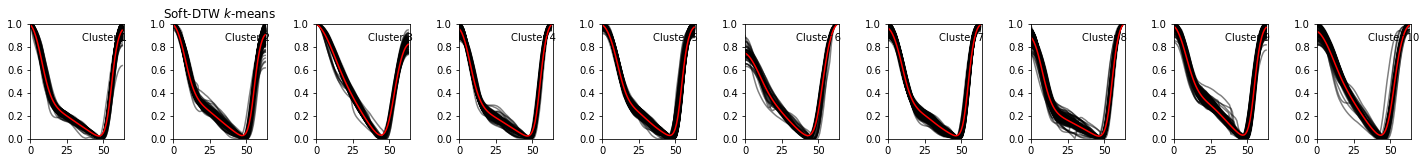

In [12]:
plt.figure(figsize=(20,20))
for yi in range(10):
    plt.subplot(10, 10, 1 + yi)
    for xx in X_train[y_pred_0_5 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.5)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(0, 1)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()